# Model 1

## Carga de datos - 1
Se realiza carga de datos obtenidos mediante web crawling a pollstar.com

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from pandas.plotting import lag_plot
import numpy  as np

In [3]:
# Se utiliza para agregar campo pais a la data cargada
def separator(x):
    ciudad, estado_pais = x.split(',', 1)
    if (len(estado_pais.strip()) == 2):
        estado_pais = "USA"
    elif ("Canada" in estado_pais):
         estado_pais = "Canada"
    return ciudad.strip(), estado_pais.strip()

In [4]:
filename = "/home/bberrios/experimento-1/filtrar/live_boxoffice-all-2.txt"
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
events = pd.read_csv(filename, sep='\t', parse_dates=['StartPlayDate'], date_parser=dateparse)
events['city'], events['country'] = zip(*events['cityStateCountry'].apply(separator))
events.head()

,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows,city,country
0,2018-05-05,KENNY CHESNEY,Kenny Chesney,U.S. Bank Stadium,"Minneapolis, MN",48255,48255,100,29.00,260.00,4999184,US DOLLAR,4999184,1,Minneapolis,USA
1,2018-05-04,FOO FIGHTERS,Foo Fighters,Bridgestone Arena,"Nashville, TN",13537,13537,100,49.00,99.00,1264443,US DOLLAR,1264443,1,Nashville,USA
2,2018-05-02,SPRINGSTEEN ON BROADWAY,Springsteen On Broadway / Bruce Springsteen,Walter Kerr Theatre,"New York, NY",3792,948,100,75.00,850.00,1928605,US DOLLAR,1928605,4,New York,USA
3,2018-05-01,DON BROCO,Don Broco,Keele University,"Keele, United Kingdom",797,1100,73,25.00,28.00,27432,UK Pounds,19937,1,Keele,United Kingdom
4,2018-05-01,DARYL HALL JOHN OATES,Daryl Hall & John Oates / Train,Golden 1 Center,"Sacramento, CA",8840,10259,87,45.97,125.97,650141,US DOLLAR,650141,1,Sacramento,USA


## Carga de datos - 2
Se cargan datos obtenidos desde musicbrainz.org

In [5]:
filename_styles = "/home/bberrios/experimento-1/estilos-ultima-version.txt"
styles = pd.read_csv(filename_styles, sep=';')
styles.head()

,artist,style
0,"McKnight, Brian","adult contemporary,contemporary r&b,pop,r&b,soul"
1,NOT3S,NaN
2,WHITNEY TAI,NaN
3,BREEDERS,"4ad,alternative rock,american,rock and indie,usa"
4,CHEESE ON BREAD,NaN


In [6]:
clean_styles = styles.dropna(subset = ['style'])

In [7]:
list_styles_artist = []
for index, row in clean_styles.iterrows():
    st_list = row['style'].split(",")
    for s in st_list:
        list_styles_artist.append({'artist' : row['artist'],'style': s.strip()})


styles_df = pd.DataFrame(list_styles_artist) 
styles_df.head()

,artist,style
0,"McKnight, Brian",adult contemporary
1,"McKnight, Brian",contemporary r&b
2,"McKnight, Brian",pop
3,"McKnight, Brian",r&b
4,"McKnight, Brian",soul


Se unen las 2 fuentes de datos en un "inner join"

In [8]:
joined = styles_df.merge(
    events, 
    left_on=['artist'], 
    right_on=['sortName'], 
    how='inner', 
    indicator=False)
joined = joined.fillna(0)
joined[:10]

,artist,style,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows,city,country
0,"McKnight, Brian",adult contemporary,2018-02-10,"McKnight, Brian",Brian McKnight,Crown Theatre,"Fayetteville, NC",1080,2442,45,48.0,100.0,64062,US DOLLAR,64062,1,Fayetteville,USA
1,"McKnight, Brian",contemporary r&b,2018-02-10,"McKnight, Brian",Brian McKnight,Crown Theatre,"Fayetteville, NC",1080,2442,45,48.0,100.0,64062,US DOLLAR,64062,1,Fayetteville,USA
2,"McKnight, Brian",pop,2018-02-10,"McKnight, Brian",Brian McKnight,Crown Theatre,"Fayetteville, NC",1080,2442,45,48.0,100.0,64062,US DOLLAR,64062,1,Fayetteville,USA
3,"McKnight, Brian",r&b,2018-02-10,"McKnight, Brian",Brian McKnight,Crown Theatre,"Fayetteville, NC",1080,2442,45,48.0,100.0,64062,US DOLLAR,64062,1,Fayetteville,USA
4,"McKnight, Brian",soul,2018-02-10,"McKnight, Brian",Brian McKnight,Crown Theatre,"Fayetteville, NC",1080,2442,45,48.0,100.0,64062,US DOLLAR,64062,1,Fayetteville,USA
5,BREEDERS,4ad,2018-04-10,BREEDERS,The Breeders,McMenamins Crystal Ballroom,"Portland, OR",1425,1425,100,25.0,28.0,35670,US DOLLAR,35670,1,Portland,USA
6,BREEDERS,alternative rock,2018-04-10,BREEDERS,The Breeders,McMenamins Crystal Ballroom,"Portland, OR",1425,1425,100,25.0,28.0,35670,US DOLLAR,35670,1,Portland,USA
7,BREEDERS,american,2018-04-10,BREEDERS,The Breeders,McMenamins Crystal Ballroom,"Portland, OR",1425,1425,100,25.0,28.0,35670,US DOLLAR,35670,1,Portland,USA
8,BREEDERS,rock and indie,2018-04-10,BREEDERS,The Breeders,McMenamins Crystal Ballroom,"Portland, OR",1425,1425,100,25.0,28.0,35670,US DOLLAR,35670,1,Portland,USA
9,BREEDERS,usa,2018-04-10,BREEDERS,The Breeders,McMenamins Crystal Ballroom,"Portland, OR",1425,1425,100,25.0,28.0,35670,US DOLLAR,35670,1,Portland,USA


In [92]:
success = joined[
    (joined.capacityPercentage >= 80) &
    (joined.country == 'USA')]
no_sucess = joined[
    (joined.capacityPercentage < 60) &
    (joined.country == 'USA')]

Codificacion de estilos a números

In [93]:
styles = set(joined['style'].tolist())
encoded_styles = {}
reverse_encoded_styles = {}
index = 0
for style in styles:
    encoded_styles[style] = index
    reverse_encoded_styles[index] = style
    index += 1

Codificacion de lugares a números

In [94]:
locations = set(joined['cityStateCountry'].tolist())
encoded_locations = {}
reverse_encoded_locations = {}
index = 0
for location in locations:
    encoded_locations[location] = index
    reverse_encoded_locations[index] = location
    index += 1

In [95]:
success_axis_styles = [encoded_styles[s] for s in success['style'].tolist()]
success_axis_locations = [encoded_locations[l] for l in success['cityStateCountry'].tolist() ]

no_success_axis_styles = [encoded_styles[s] for s in no_sucess['style'].tolist()]
no_success_axis_locations = [encoded_locations[l] for l in no_sucess['cityStateCountry'].tolist()]

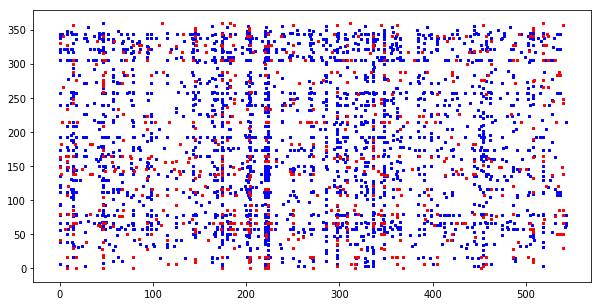

In [96]:
fig = plt.figure(figsize=(10, 5))
plt.rcParams['figure.figsize'] = [50, 50]

ax1 = fig.add_subplot(111)

ax1.scatter(x = success_axis_styles, 
            y = success_axis_locations, 
            c='b', label = 'success',
            s=5, marker="s")
ax1.scatter(x = no_success_axis_styles, 
            y = no_success_axis_locations, 
            c='r', 
            label = 'no success',
            s=5, marker="s")

¿qué significa?
- Cada lugar tiene preferencia por estilos de música particulares.
- ¿En función de lo anterior sería posible construir un modelo por cada lugar?
- ¿Es posible existan ciudades que comparta simulitudes respecto a estilos de música?



¿ciudad con más estilos de mùsica como exitosos?

In [99]:
grouping_city = success.groupby(['cityStateCountry'])
df = grouping_city['style'].agg(['count']).replace(np.nan, 0, regex=True)
df=df.reset_index()
df.sort_values(by = ['count'], ascending = [0])[:10]

,cityStateCountry,count
91,"Las Vegas, NV",112
22,"Boston, MA",110
32,"Chicago, IL",82
13,"Austin, TX",76
211,"Washington, DC",75
189,"St. Louis, MO",71
151,"Portland, OR",66
119,"Nashville, TN",64
125,"New York, NY",62
127,"Newark, NJ",56


In [108]:
joined[
    (joined['cityStateCountry'] == 'Las Vegas, NV') &
    (joined['capacityPercentage'] < 60)]

,artist,style,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows,city,country
2905,DOOBIE BROTHERS,blue-eyed soul,2018-04-07,DOOBIE BROTHERS,Doobie Brothers,The Chelsea At The Cosmopolitan,"Las Vegas, NV",1571,2690,59,19.5,109.0,117290,US DOLLAR,117290,1,Las Vegas,USA
2906,DOOBIE BROTHERS,boogie rock,2018-04-07,DOOBIE BROTHERS,Doobie Brothers,The Chelsea At The Cosmopolitan,"Las Vegas, NV",1571,2690,59,19.5,109.0,117290,US DOLLAR,117290,1,Las Vegas,USA
2907,DOOBIE BROTHERS,pop rock,2018-04-07,DOOBIE BROTHERS,Doobie Brothers,The Chelsea At The Cosmopolitan,"Las Vegas, NV",1571,2690,59,19.5,109.0,117290,US DOLLAR,117290,1,Las Vegas,USA
2908,DOOBIE BROTHERS,rock,2018-04-07,DOOBIE BROTHERS,Doobie Brothers,The Chelsea At The Cosmopolitan,"Las Vegas, NV",1571,2690,59,19.5,109.0,117290,US DOLLAR,117290,1,Las Vegas,USA
2909,DOOBIE BROTHERS,soft rock,2018-04-07,DOOBIE BROTHERS,Doobie Brothers,The Chelsea At The Cosmopolitan,"Las Vegas, NV",1571,2690,59,19.5,109.0,117290,US DOLLAR,117290,1,Las Vegas,USA
2910,DOOBIE BROTHERS,yacht rock,2018-04-07,DOOBIE BROTHERS,Doobie Brothers,The Chelsea At The Cosmopolitan,"Las Vegas, NV",1571,2690,59,19.5,109.0,117290,US DOLLAR,117290,1,Las Vegas,USA
4061,GALACTIC,hip hop rnb and dance hall,2018-03-27,GALACTIC,Galactic,Brooklyn Bowl Las Vegas,"Las Vegas, NV",524,1000,53,22.0,25.0,11528,US DOLLAR,11528,1,Las Vegas,USA


In [111]:
joined[
    (joined['cityStateCountry'] == 'Las Vegas, NV') &
    (joined['capacityPercentage'] >= 80)][:10]

,artist,style,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows,city,country
240,PIANO GUYS,cello rock,2018-01-27,PIANO GUYS,The Piano Guys,The Smith Center / Cabaret Jazz,"Las Vegas, NV",1932,1932,100,31.00,145.00,133417,US DOLLAR,133417,1,Las Vegas,USA
245,PIANO GUYS,crossover,2018-01-27,PIANO GUYS,The Piano Guys,The Smith Center / Cabaret Jazz,"Las Vegas, NV",1932,1932,100,31.00,145.00,133417,US DOLLAR,133417,1,Las Vegas,USA
250,PIANO GUYS,easy listening,2018-01-27,PIANO GUYS,The Piano Guys,The Smith Center / Cabaret Jazz,"Las Vegas, NV",1932,1932,100,31.00,145.00,133417,US DOLLAR,133417,1,Las Vegas,USA
1182,JERRY SEINFELD,comedy,2018-04-20,JERRY SEINFELD,Jerry Seinfeld,The Colosseum At Caesars Palace,"Las Vegas, NV",7256,3695,100,82.50,165.00,862032,US DOLLAR,862032,2,Las Vegas,USA
1187,JERRY SEINFELD,comedy,2018-03-09,JERRY SEINFELD,Jerry Seinfeld,The Colosseum At Caesars Palace,"Las Vegas, NV",6732,3427,100,82.50,165.00,808214,US DOLLAR,808214,2,Las Vegas,USA
1550,ARTURO SANDOVAL,afro-cuban,2018-03-30,ARTURO SANDOVAL,Arturo Sandoval,The Smith Center / Cabaret Jazz,"Las Vegas, NV",519,244,100,35.00,61.00,26020,US DOLLAR,26020,3,Las Vegas,USA
1551,ARTURO SANDOVAL,jazz,2018-03-30,ARTURO SANDOVAL,Arturo Sandoval,The Smith Center / Cabaret Jazz,"Las Vegas, NV",519,244,100,35.00,61.00,26020,US DOLLAR,26020,3,Las Vegas,USA
1552,ARTURO SANDOVAL,latin jazz,2018-03-30,ARTURO SANDOVAL,Arturo Sandoval,The Smith Center / Cabaret Jazz,"Las Vegas, NV",519,244,100,35.00,61.00,26020,US DOLLAR,26020,3,Las Vegas,USA
2060,BON JOVI,glam metal,2018-03-17,BON JOVI,Bon Jovi,T-Mobile Arena,"Las Vegas, NV",12779,15033,86,19.75,552.75,1174755,US DOLLAR,1174755,1,Las Vegas,USA
2065,BON JOVI,hard rock,2018-03-17,BON JOVI,Bon Jovi,T-Mobile Arena,"Las Vegas, NV",12779,15033,86,19.75,552.75,1174755,US DOLLAR,1174755,1,Las Vegas,USA
